In [1]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
microarray = pd.read_csv("../microarray.csv")
patients = pd.read_csv("../patients.csv")
tmp = [i.split("_")[1].split("LYM")[1] for i in microarray.columns if "LYM" in i] #numeros associados ao LYM (pacientes)
tmp2 = patients["DLBCL sample (LYM number)"].tolist() #numero dos pacientes
tmp2 = [str(n).zfill(3) for n in tmp2]# passa para formato '00#'

patients["DLBCL sample (LYM number)"] = patients["DLBCL sample (LYM number)"].map(lambda x: str(x).zfill(3))# passa para formato '00#'

def get_good_columns(columns):
    new_col = []
    for col in columns:
        if col == "NAME" or col == "UNIQID":
            new_col.append(True)
        elif "LYM" in col:
            ah = col.split("_")[1].split("LYM")[1]
            if ah in tmp2:
                new_col.append(True)
            else:
                new_col.append(False)
        else:
            new_col.append(False)
    return new_col
def new_names(columns):
    new_col = []
    for col in columns:
        if col == "NAME" or col == "UNIQID":
            new_col.append(col)
        else:
            print(col)
            ah = col.split("_")[1].split("LYM")[1]
            new_col.append(ah)
    return new_col

#identify columns in microarray that have a correspondence on patients
microarray = microarray.loc[:,get_good_columns(microarray.columns)]
microarray.columns = new_names(microarray.columns) #Name, unique, 009, 186, etc

# Drop column of name of the genes, we will only keep the UNIQID.
microarray = microarray.drop("NAME", axis=1)
# We will use the transpose of the dataframe as it's easier.
microarray = microarray.T
microarray.columns = map(int,microarray.iloc[0])
microarray = microarray.drop("UNIQID") #pacientes nas linhas, genes nas colunas


MLC94-46_LYM009_de novo untreated
MLC96-45_LYM186_de novo untreated
MLC91-27_LYM427_de novo untreated
MLC95-43_LYM095_de novo untreated
MLC91-28_LYM428_de novo untreated
MLC94-50_LYM004_de novo untreated
MLC95-46_LYM098_de novo untreated
MLC95-62_LYM114_de novo untreated
MLC95-85_LYM137_de novo untreated
MLC94-67_LYM027_de novo untreated
MLC94-100_LYM057_de novo untreated
MLC96-31_LYM173_de novo untreated
MLC91-33_LYM398_de novo untreated
MLC91-14_LYM432_de novo untreated
MLC96-22_LYM164_de novo untreated
MLC96-92_LYM233_de novo untreated
MLC95-57_LYM109_de novo untreated
MLC91-42_LYM409_de novo untreated
MLC92-53_LYM248_de novo untreated
MLC95-60_LYM112_de novo untreated
MLC95-84_LYM136_de novo untreated
MLC95-26_LYM079_de novo untreated
MLC96-35_LYM177_de novo untreated
MLC96-82_LYM223_de novo untreated
MLC95-18_LYM072_de novo untreated
MLC96-61_LYM202_de novo untreated
MLC94-59_LYM019_de novo untreated
MLC92-44_LYM279_de novo untreated
MLC92-68_LYM263_de novo untreated
MLC95-90_LYM1

# Get train and test data.

In [3]:
one_hot = {"ABC" : 0, "GCB" : 1, "Type III" : 2}

Y = patients[['DLBCL sample (LYM number)','Subgroup']].copy()
Y['Subgroup']=[one_hot[k] for k in patients["Subgroup"]]

Y=Y.sort_values(by=['DLBCL sample (LYM number)'])

y_ordered= Y['Subgroup'].tolist()

# PCA

### PCA dos genes

In [4]:
data_projected = pd.read_csv("data_projected.csv")
decomp=data_projected.loc[:,data_projected.columns!= 'Unnamed: 0'].values


print(decomp.shape)

(240, 57)


# Clustering.

In [5]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as agglo
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.cluster import SpectralClustering, BisectingKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Cluster de pessoas, os genes são as features.

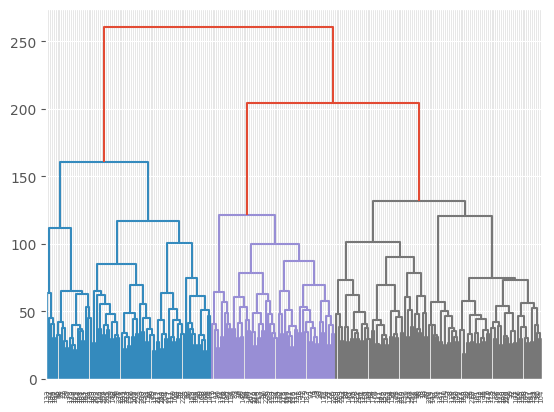

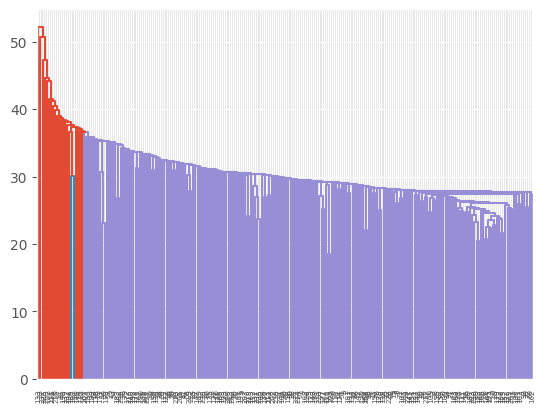

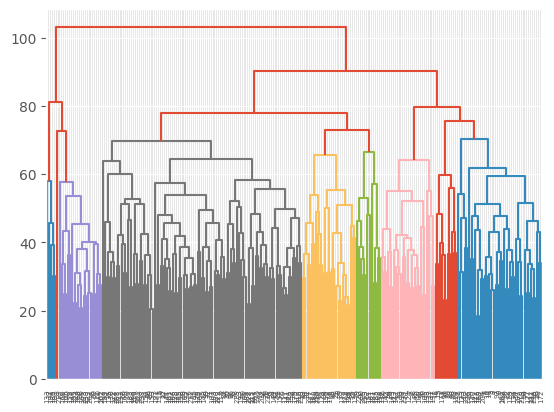

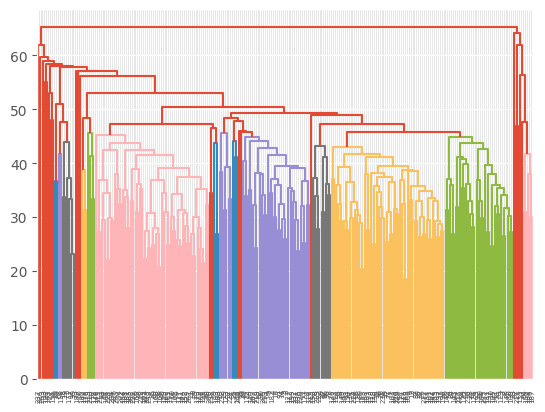

In [6]:
dend=dendrogram(linkage(decomp, method='ward'))
plt.show();

dend=dendrogram(linkage(decomp, method='single'))
plt.show();

dend=dendrogram(linkage(decomp, method='complete'))
plt.show();

dend=dendrogram(linkage(decomp, method='average'))
plt.show();

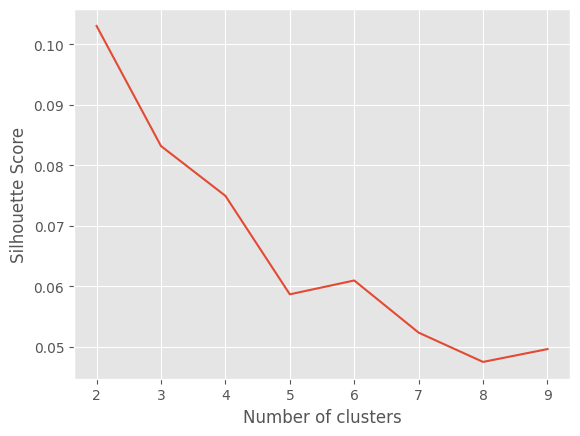

In [7]:
sil_scores = []
for i in range(2,10):
    ag=agglo(n_clusters=i, affinity='euclidean',linkage='ward')
    clusters=ag.fit_predict(decomp)
    sil_scores.append(silhouette_score(decomp, clusters))
    
fig = sns.lineplot(x=np.arange(2,10), y=sil_scores)
fig.set(ylabel='Silhouette Score', xlabel='Number of clusters');

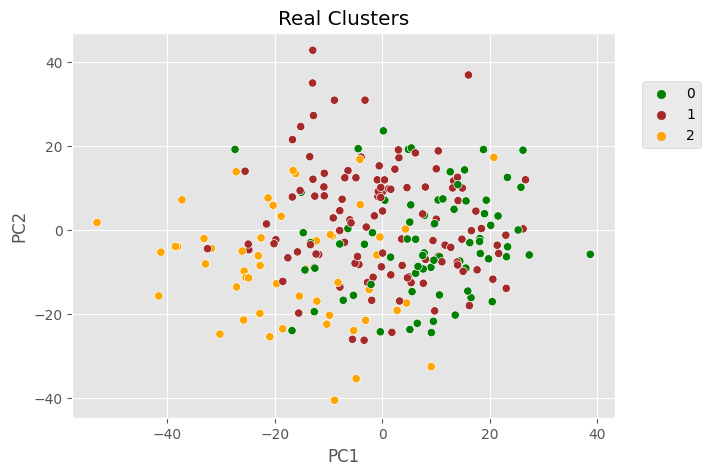

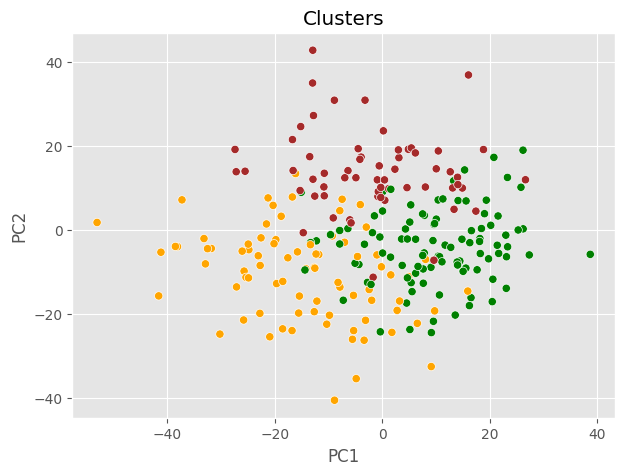

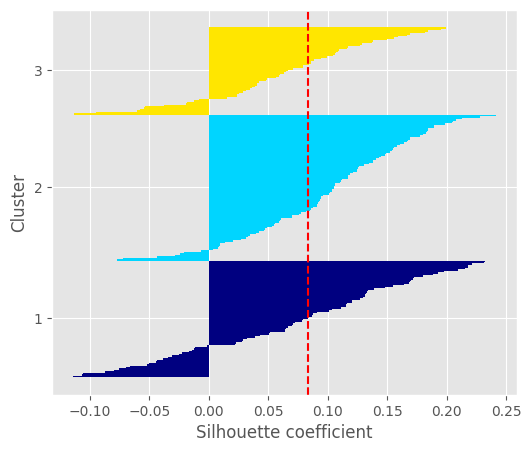

Ward's method accuracy 0.5958333333333333


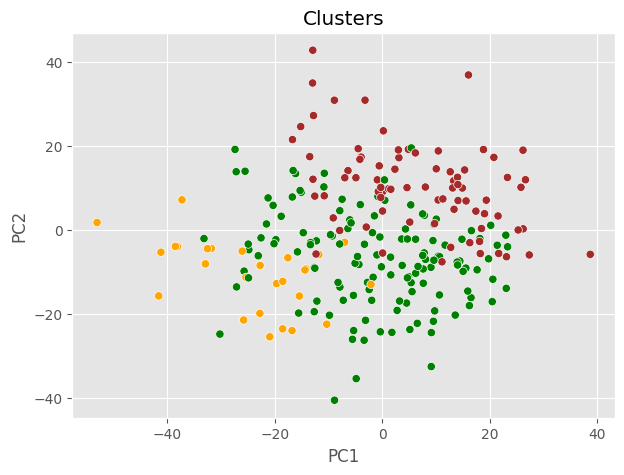

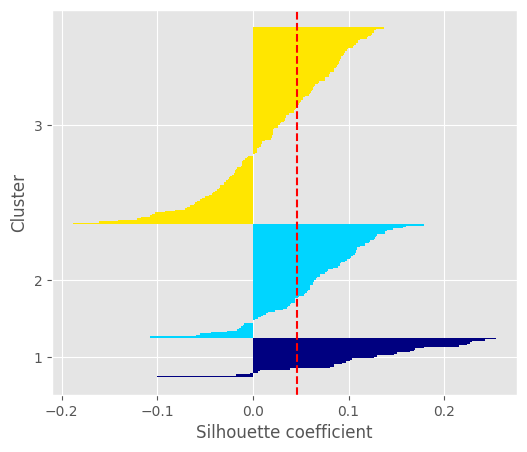

Complete linkage accuracy 0.4708333333333333


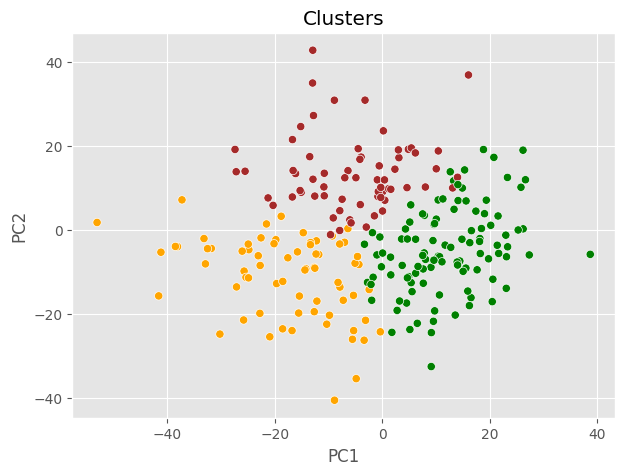

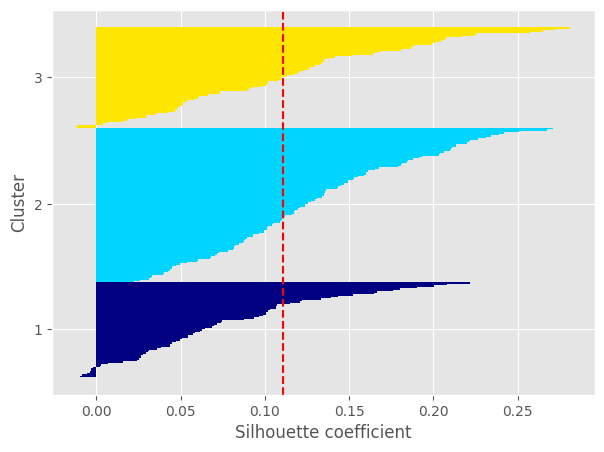

KMeans method accuracy 0.5916666666666667


In [8]:
#-----------------Real Clusters--------------
plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=y_ordered,palette=['green','brown', 'orange'])
plt.title('Real Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=(1.05,0.7))


#------------------Ward---------------------
ag=agglo(n_clusters=3, affinity='euclidean',linkage='ward')
clusters=ag.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['orange','green','brown'], legend=False)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show();

#accuracy
correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==1): 
        correct +=1
    if(y_ordered[i]== 1 and j==2): 
        correct +=1
    if(y_ordered[i]== 2 and j==0): 
        correct +=1

accuracy= correct/len(clusters)
print("Ward's method accuracy", accuracy)



#-------------------Complete Linkage----------------
ag=agglo(n_clusters=3, affinity='euclidean',linkage='complete')
clusters=ag.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['orange','brown','green'], legend=False)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==2): 
        correct +=1
    if(y_ordered[i]== 1 and j==1): 
        correct +=1
    if(y_ordered[i]== 2 and j==0): 
        correct +=1

accuracy= correct/len(clusters)
print("Complete linkage accuracy", accuracy)

#---------------------Kmeans-------------------------
kmeans = KMeans(n_clusters=3, random_state=0)
clusters=kmeans.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['brown','green','orange'],legend=False)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(7,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy
correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==1): 
        correct +=1
    if(y_ordered[i]== 1 and j==0): 
        correct +=1
    if(y_ordered[i]== 2 and j==2): 
        correct +=1

accuracy= correct/len(clusters)
print("KMeans method accuracy", accuracy)

# Linear Discriminant Analysis.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

patients
mask_training = patients["Analysis Set"] == "Training"
mask_test = patients["Analysis Set"] == "Validation"

In [10]:
Y = patients["Status at follow-up"].values
Y[Y == "Alive"]= 1 # 1 vai corresponder a alive.
Y[Y == "Dead"] = 2 # 2 vai corresponder a morto.
Y = np.array(Y, dtype = int)
X = decomp
X_train, X_test = X[mask_training], X[mask_test]
y_train, y_test = Y[mask_training], Y[mask_test]

In [11]:
#LDA with principal components

lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluate the model's performance
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.44


In [12]:
#LDA with the 5 signatures

X=patients[['Germinal center B cell signature', 'Lymph node signature', 'Proliferation signature', 'BMP6', 'MHC class II signature']]

X_train, X_test = X[mask_training], X[mask_test]
y_train, y_test = Y[mask_training], Y[mask_test]

lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluate the model's performance
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61
